<a href="https://colab.research.google.com/github/swon95/ML_Body-signal-of-smoking/blob/main/Body_signal_of_smoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설치

In [94]:
!pip install pandas-profiling==3.1.0
! pip install pdpbox
! pip install shap

     |████████████████████████████████| 261 kB 5.3 MB/s 
     |████████████████████████████████| 11.1 MB 36.0 MB/s 
     |████████████████████████████████| 596 kB 39.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 102 kB 11.8 MB/s 
     |████████████████████████████████| 3.1 MB 43.4 MB/s 
     |████████████████████████████████| 690 kB 38.4 MB/s 
     |████████████████████████████████| 303 kB 29.6 MB/s 
     |████████████████████████████████| 812 kB 75.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=000d90b07741633b94fa7df3e6208416ce570e622b7b6b4c9ffac573c26c024b
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=a4d67abb760cd6756f4ae85b9bdcce082b1dc179a6228bc48be35edf09e43910
 

     |████████████████████████████████| 34.0 MB 576 kB/s 
     |████████████████████████████████| 13.1 MB 2.7 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=a0bfa78bc54336269d961499d1ad84d0e25cf04e1a3e469bd2c337bc1d1bf54a
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 564 kB 5.1 MB/s 


# 데이터셋 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/kaggle_data/smoking.csv')
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


## 데이터셋 설명
Kaggle Data Set


---

https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

건강 생체 신호 데이터셋을 기반으로, 

흡연을 했을때 신체에 끼치는 영향들을 예측하는 모델

- ID : index
- gender (M, F)
- age - 5년 단위
- height(cm) - 키
- weight(kg) - 체중
- waist(cm) - 허리둘레길이
- eyesight(left) - 시력(왼쪽)
- eyesight(right) - 시력(오른쪽)
- hearing(left) - 청력(왼쪽)
- hearing(right) - 청력(오른쪽)
- systolic - 수축계 혈압
- relaxation - 이완계 혈압
- fasting blood sugar - 공복 혈당
- Cholesterol - 총 콜레스테롤수치
- triglyceride - 트리글리세리드, 중성지방
- HDL - 콜레스테롤의 유형
- LDL - 콜레스테롤의 유형
- hemoglobin - 헤모글로빈 수치
- Urine protein - 소변 내 단백질 량
- serum creatinine - 혈청 크레아틴
- AST - 간 건강의 척도
- ALT - 간 건강의 척도
- Gtp - 간 기능 검사
- oral - 구강 건강
- dental caries - 충치의 유무
- tartar - 치석
- smoking - 흡연 유무 (타겟)

# Feature Engineering

## BMI 특성 생성

In [22]:
# 체중과 키를 기반으로 BMI 계산공식을 대입
df["bmi"] = df["weight(kg)"] / (df["height(cm)"]/100)**2
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,bmi
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0,24.973985
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0,23.437500
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,1.0,1.0,21.0,16.0,22.0,Y,0,N,1,20.761246
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0,25.711662
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,1.0,0.6,16.0,14.0,22.0,Y,0,N,0,24.973985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0,22.491349
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0,19.531250
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,1.0,0.5,17.0,11.0,12.0,Y,0,N,0,19.531250
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,1.0,0.7,20.0,19.0,18.0,Y,0,N,0,22.038567


# 전처리

In [ ]:
df.dtypes

ID                       int64
gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
bmi                    float64
dtype: object

## 불필요하다 판단되는 특성 제거
- 여러 특성들중 도메인지식을 섞어 흡연과 연관성이 있는 특성만 남김

In [23]:
# 카디널리티가 샘플 수 만큼 존재했던 ID 특성은 제거
# 카디널리티가 높으면(중복도가 적으면) 모델 학습에 편향(과적합)된 학습을 초래하기 때문에
# oral 특성은 전체 값이 Y 이므로, 학습에 유해한 영향을 미칠것같아 제거해줌
df.drop(['ID','height(cm)','weight(kg)','waist(cm)','eyesight(left)','eyesight(right)','hearing(left)','hearing(right)','Cholesterol','HDL','LDL','Urine protein','serum creatinine','oral'],axis = 1, inplace = True)
df

,gender,age,systolic,relaxation,fasting blood sugar,triglyceride,hemoglobin,AST,ALT,Gtp,dental caries,tartar,smoking,bmi
0,F,40,114.0,73.0,94.0,82.0,12.9,18.0,19.0,27.0,0,Y,0,24.973985
1,F,40,119.0,70.0,130.0,115.0,12.7,22.0,19.0,18.0,0,Y,0,23.437500
2,M,55,138.0,86.0,89.0,182.0,15.8,21.0,16.0,22.0,0,N,1,20.761246
3,M,40,100.0,60.0,96.0,254.0,14.7,19.0,26.0,18.0,0,Y,0,25.711662
4,F,40,120.0,74.0,80.0,74.0,12.5,16.0,14.0,22.0,0,N,0,24.973985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,110.0,68.0,89.0,99.0,12.3,14.0,7.0,10.0,1,Y,0,22.491349
55688,F,45,101.0,62.0,89.0,69.0,14.0,20.0,12.0,14.0,0,Y,0,19.531250
55689,F,55,117.0,72.0,88.0,77.0,12.4,17.0,11.0,12.0,0,N,0,19.531250
55690,M,60,133.0,76.0,107.0,79.0,14.4,20.0,19.0,18.0,0,N,0,22.038567


In [ ]:
df.dtypes

gender                  object
age                      int64
systolic               float64
relaxation             float64
fasting blood sugar    float64
triglyceride           float64
hemoglobin             float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries            int64
tartar                  object
smoking                  int64
bmi                    float64
dtype: object

## 특성의 unique 값 변경

- encoder를 사용하지 않음

In [24]:
df.replace({'gender': {'M' : 0, 'F' : 1}, 'tartar': {'Y' : 1, 'N' : 0}}, inplace = True)
df

,gender,age,systolic,relaxation,fasting blood sugar,triglyceride,hemoglobin,AST,ALT,Gtp,dental caries,tartar,smoking,bmi
0,1,40,114.0,73.0,94.0,82.0,12.9,18.0,19.0,27.0,0,1,0,24.973985
1,1,40,119.0,70.0,130.0,115.0,12.7,22.0,19.0,18.0,0,1,0,23.437500
2,0,55,138.0,86.0,89.0,182.0,15.8,21.0,16.0,22.0,0,0,1,20.761246
3,0,40,100.0,60.0,96.0,254.0,14.7,19.0,26.0,18.0,0,1,0,25.711662
4,1,40,120.0,74.0,80.0,74.0,12.5,16.0,14.0,22.0,0,0,0,24.973985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,1,40,110.0,68.0,89.0,99.0,12.3,14.0,7.0,10.0,1,1,0,22.491349
55688,1,45,101.0,62.0,89.0,69.0,14.0,20.0,12.0,14.0,0,1,0,19.531250
55689,1,55,117.0,72.0,88.0,77.0,12.4,17.0,11.0,12.0,0,0,0,19.531250
55690,0,60,133.0,76.0,107.0,79.0,14.4,20.0,19.0,18.0,0,0,0,22.038567


In [ ]:
df.dtypes

gender                   int64
age                      int64
systolic               float64
relaxation             float64
fasting blood sugar    float64
triglyceride           float64
hemoglobin             float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries            int64
tartar                   int64
smoking                  int64
bmi                    float64
dtype: object

## 판다스 프로파일링

In [ ]:
from pandas_profiling import ProfileReport
profile = merge.profile_report()
profile

# 시각화

## 범주의 비율 확인

In [6]:
df['gender'].value_counts(normalize=True)

0    0.635657
1    0.364343
Name: gender, dtype: float64

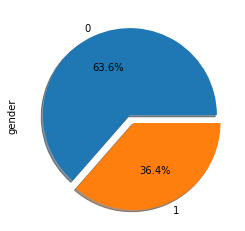

In [7]:
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

흡연을 하지 않는 사람의 비중이 더 많은것을 확인

unbalance

In [8]:
df['smoking'].value_counts(normalize=True)

0    0.632712
1    0.367288
Name: smoking, dtype: float64

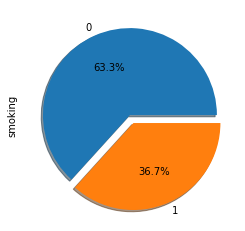

In [9]:
df['smoking'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

smoking 특성과 gender 특성을 그룹화 하여 어떤 성별이 흡연자의 분포가 많은지 확인 

In [14]:
# gender 0-M, 1-F
# 남성의 경우 비등한 분포를 알 수 있고, 여성의 경우 편향된 분포를 알 수 있다.
df.groupby('gender')['smoking'].value_counts(normalize=True).round(2)

gender  smoking
0       1          0.55
        0          0.45
1       0          0.96
        1          0.04
Name: smoking, dtype: float64

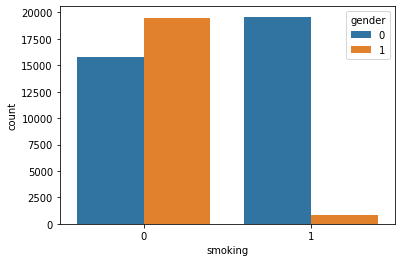

In [19]:
sns.countplot(x="smoking", hue="gender", data=df)
plt.show()

## 상관관계 분석

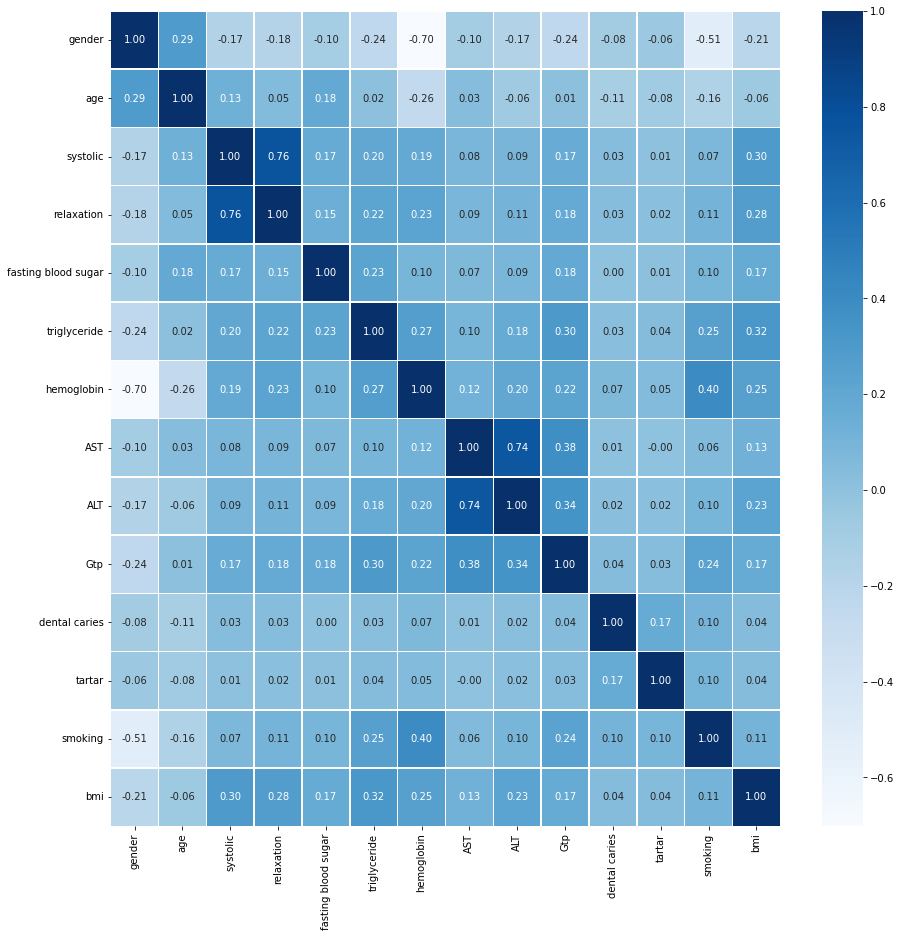

In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

# 분류문제의 기준모델

## accuracy_score 로 정확도 계산

In [73]:
from sklearn.metrics import accuracy_score

target = df['smoking']

major = target.mode()[0]
predict = [major] * len(target)

score = accuracy_score(target, predict)
print('기준모델 정확도 :', score)

기준모델 정확도 : 0.6327120591826474


## 데이터 분리


### train, val, test (hold-out)
- 데이터의 샘플수가 충분하다 판단되어 hold-out 기법으로 한번에 분리해줌

In [27]:
from sklearn.model_selection import train_test_split

target = 'smoking'

X = df.drop([target], axis = 1)
y = df[target]

# 원본 데이터로 train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 분리한 train 데이터로 다시 train, val 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8,random_state=42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(35642, 13)
(8911, 13)
(11139, 13)
(35642,)
(8911,)
(11139,)


# 모델학습

- 중복 코드를 최소화 하기 위해 파이프라인을 사용

- 특성들의 스케일이 차이가 있는 경우, 학습에 영향을 끼칠 수 있어 standardScaler 로 표준화 스케일링을 해줌.

## 로지스틱회귀 모델

In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(
    StandardScaler(), 
    LogisticRegression(n_jobs=-1) # n_jobs=-1 컴퓨터의 모든 코어를 사용
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)

print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도', pipe.score(X_val, y_val))

훈련 정확도:  0.7449918635317884
검증 정확도 0.7491863988329032


## 결정트리 모델

In [30]:
from sklearn.tree import DecisionTreeClassifier

pipe1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=1, criterion='entropy') # entropy = 불순도 계산방법 적용
)

pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_val)
print('훈련 정확도: ', pipe1.score(X_train, y_train))
print('검증 정확도: ', pipe1.score(X_val, y_val))

훈련 정확도:  1.0
검증 정확도:  0.7642239928178656


## 랜덤포레스트 모델

In [31]:
from sklearn.ensemble import RandomForestClassifier

pipe2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=150) # n_estimators = 생성할 의사결정 나무 개수
)

pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_val)
print('훈련 정확도: ', pipe2.score(X_train, y_train))
print('검증 정확도: ', pipe2.score(X_val, y_val))

훈련 정확도:  1.0
검증 정확도:  0.8146111547525531


# 분류 모델의 성능 평가 지표

## Confusion Matrix

- 혼동행렬을 통해 모델의 예측값과 실제값을 한 눈에 파악할 수 있다.
- x(예측), y(실제) 축의 내용이 바뀔 수 있기때문에 주의요망

### 로지스틱회귀 모델

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


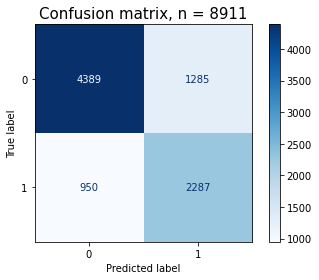

In [32]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

### 결정트리 모델

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


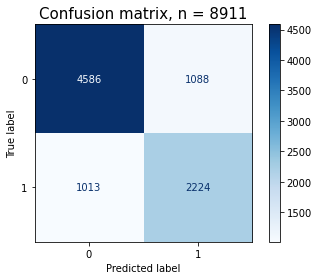

In [33]:
fig, ax = plt.subplots()
pcm1 = plot_confusion_matrix(pipe1, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

### 랜덤포레스트 모델

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


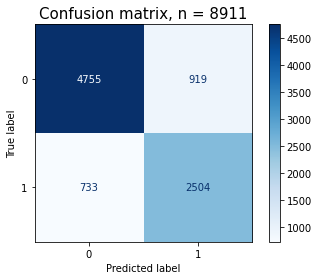

In [34]:
fig, ax = plt.subplots()
pcm2 = plot_confusion_matrix(pipe2, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

## 정확도 계산

### 로지스틱회귀 모델

In [35]:
matrix = pcm.confusion_matrix
matrix

array([[4389, 1285],
       [ 950, 2287]])

- TP (실제 P 를 P 로 잘 예측한 경우)

In [36]:
matrix[1][1]

2287

- 정확하게 맞춘 예측의 합 (TP + TN)
- TN (실제 N 을 N 으로 잘 예측한 경우)



In [37]:
import numpy as np

# .diag 대각 행렬을 구하는 함수
correct_predict = np.diag(matrix).sum()
correct_predict

6676

- 예측한 총 개수

In [38]:
total_predict = matrix.sum()
total_predict

8911

- 분류 정확도 = TP + TN / Total

In [39]:
correct_predict / total_predict

0.7491863988329032

### 결정트리 모델

In [40]:
matrix1 = pcm1.confusion_matrix
matrix1

array([[4586, 1088],
       [1013, 2224]])

In [41]:
matrix1[1][1]

2224

In [42]:
correct_predict1 = np.diag(matrix1).sum()
correct_predict1

6810

In [43]:
total_predict1 = matrix1.sum()
total_predict1

8911

In [44]:
correct_predict1 / total_predict1

0.7642239928178656

### 랜덤포레스트 모델

In [45]:
matrix2 = pcm2.confusion_matrix
matrix2

array([[4755,  919],
       [ 733, 2504]])

In [46]:
matrix2[1][1]

2504

In [47]:
correct_predict2 = np.diag(matrix2).sum()
correct_predict2

7259

In [52]:
total_predict2 = matrix2.sum()
total_predict2

8911

In [53]:
correct_predict2 / total_predict2

0.8146111547525531

## 다른 평가지표 사용
- 모델의 성능을 파악하기 위해서는 정확도 만으론 부족하기에 다른 평가지표를 통해 검증한다.

### 로지스틱회귀 모델

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      5674
           1       0.64      0.71      0.67      3237

    accuracy                           0.75      8911
   macro avg       0.73      0.74      0.73      8911
weighted avg       0.76      0.75      0.75      8911



### 결정트리 모델

In [55]:
print(classification_report(y_val, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      5674
           1       0.67      0.69      0.68      3237

    accuracy                           0.76      8911
   macro avg       0.75      0.75      0.75      8911
weighted avg       0.77      0.76      0.76      8911



### 랜덤포레스트 모델

In [56]:
print(classification_report(y_val, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      5674
           1       0.73      0.77      0.75      3237

    accuracy                           0.81      8911
   macro avg       0.80      0.81      0.80      8911
weighted avg       0.82      0.81      0.82      8911



## 검증곡선

In [ ]:
from sklearn.model_selection import validation_curve



# 순열중요도

- 중요하게 쓰이는 특성이 무엇인지 보여준다.

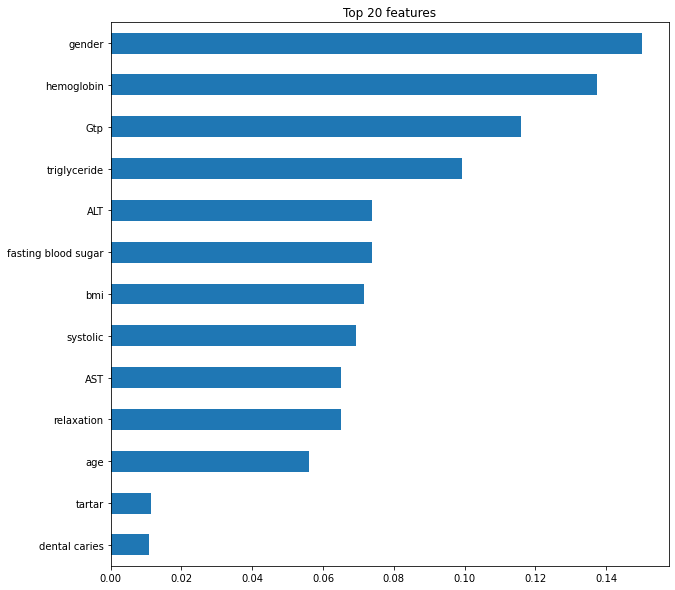

In [108]:
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

# PDP

- 특성이 타겟에 어떠한 영향을 미치는지 정보를 알 수 있다.

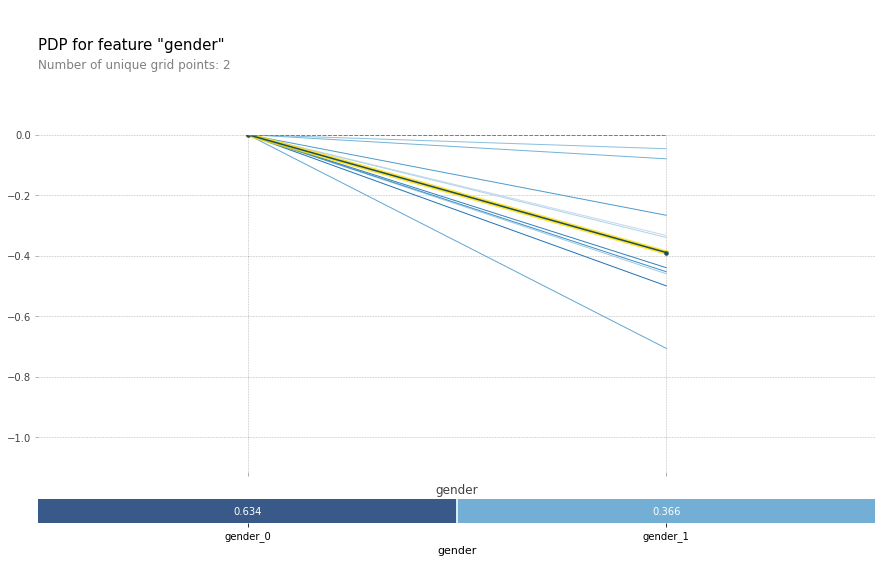

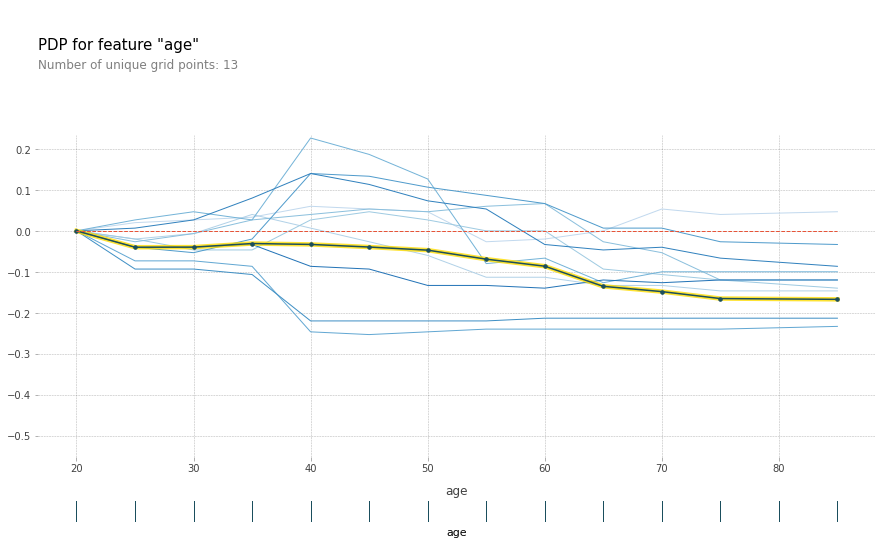

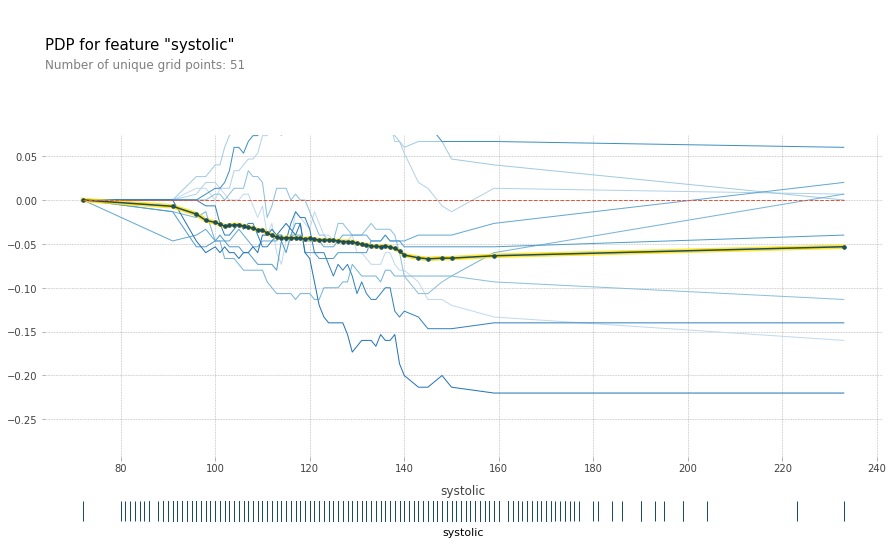

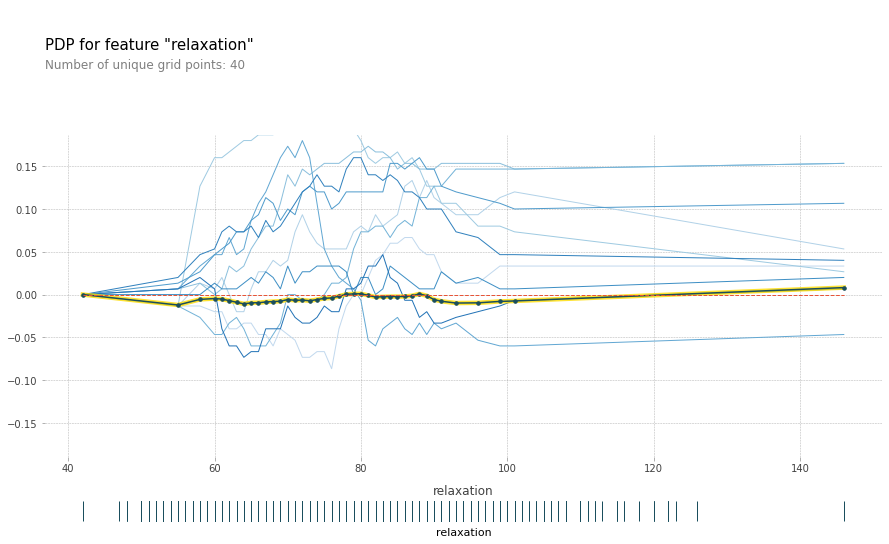

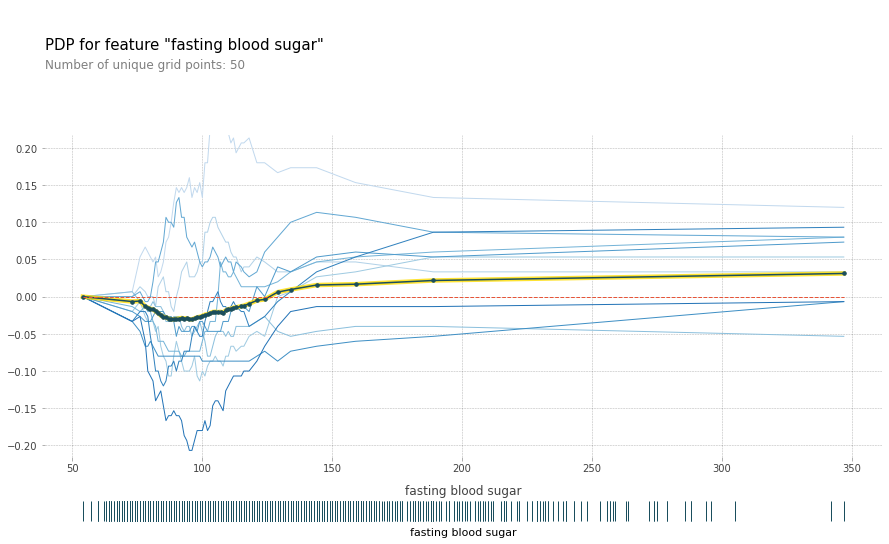

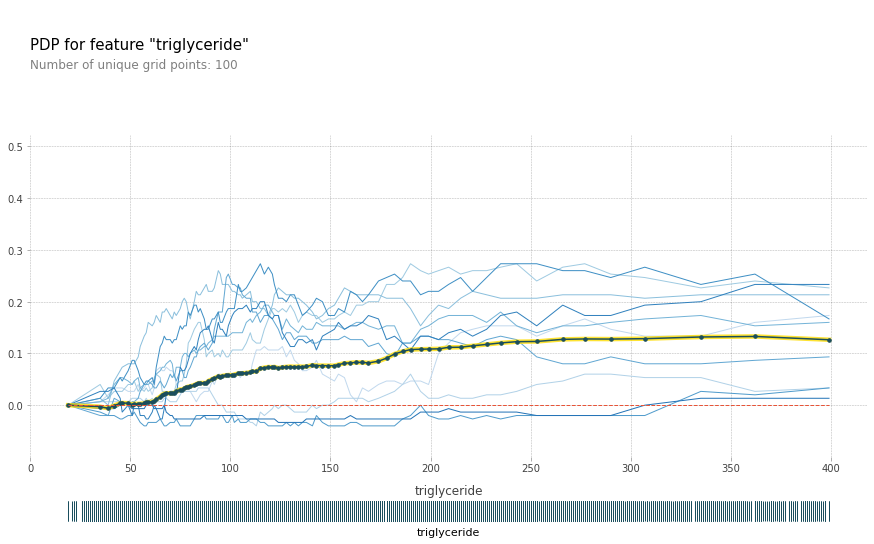

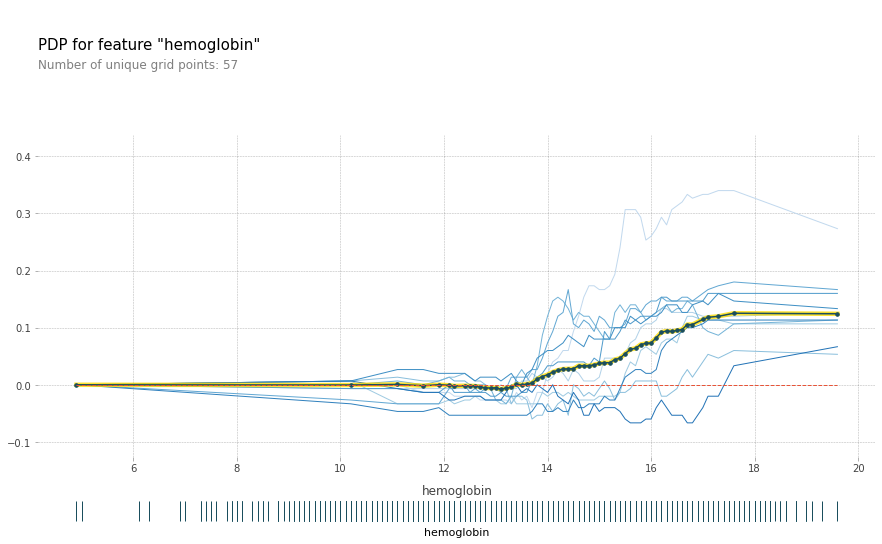

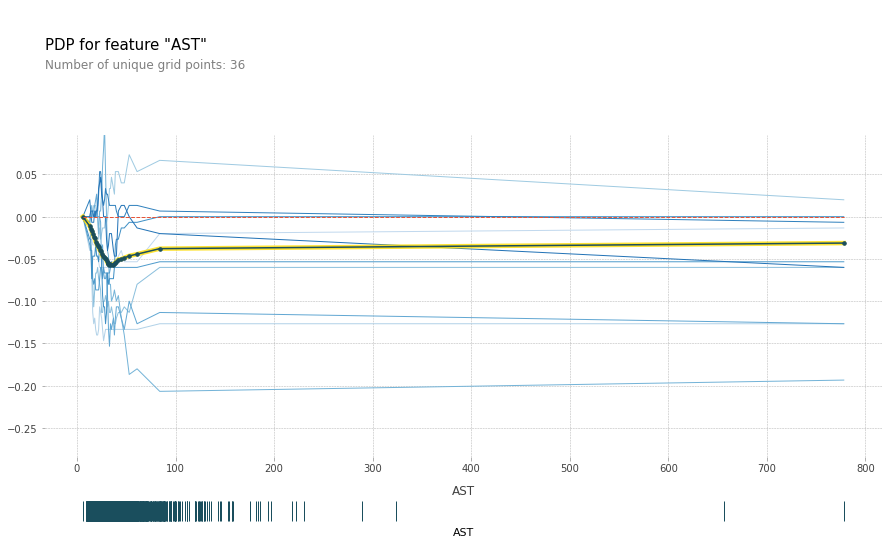

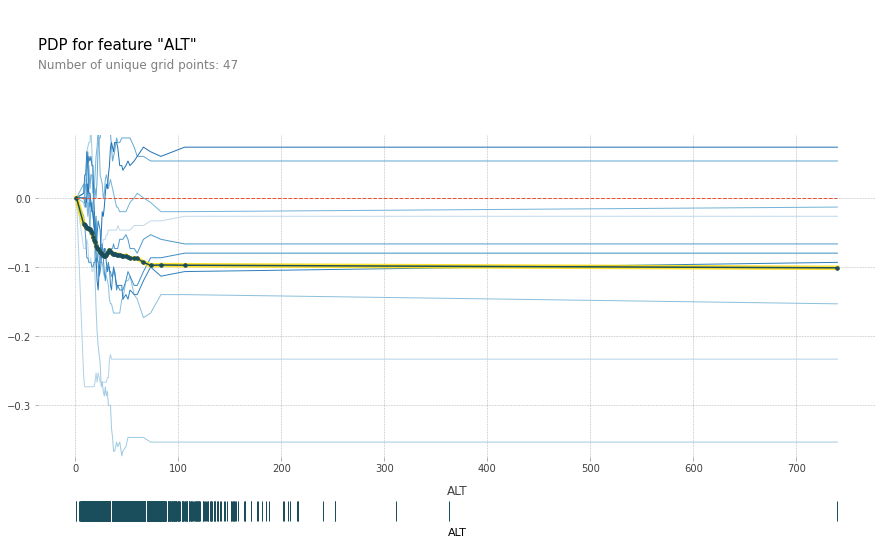

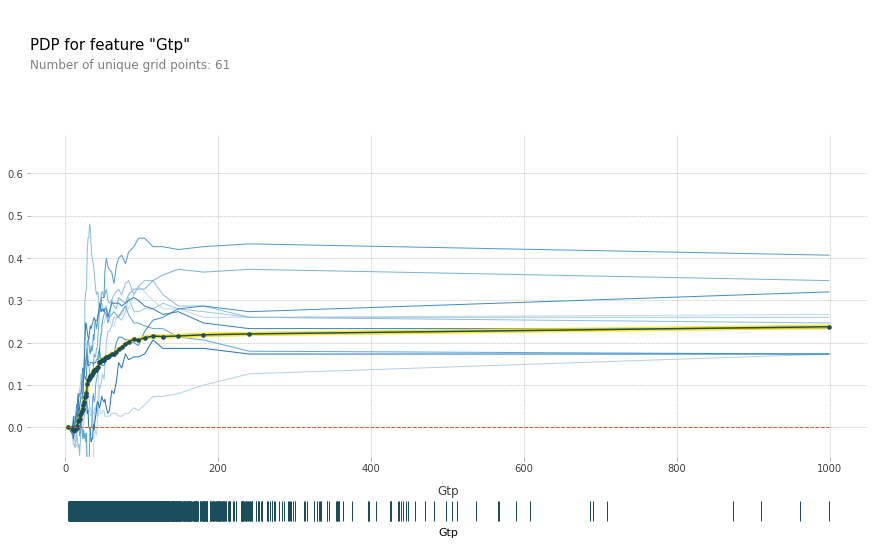

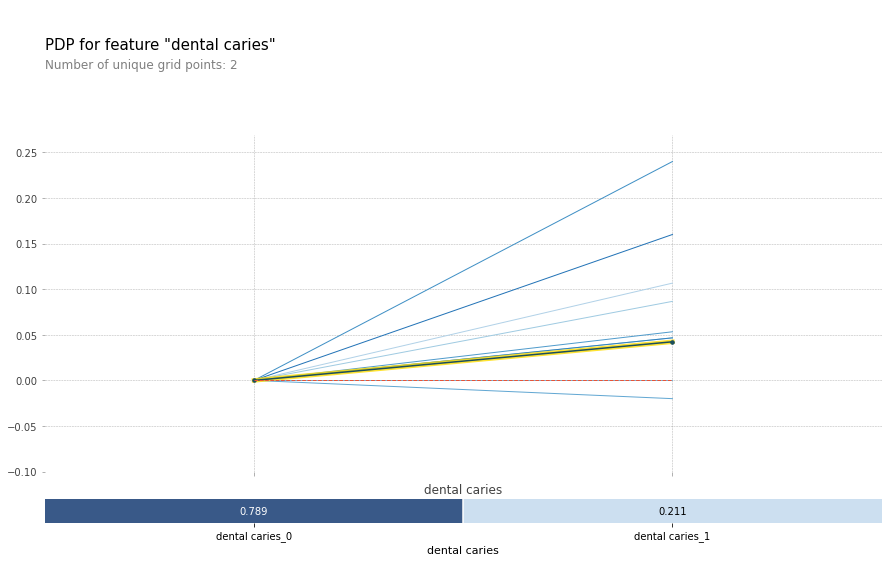

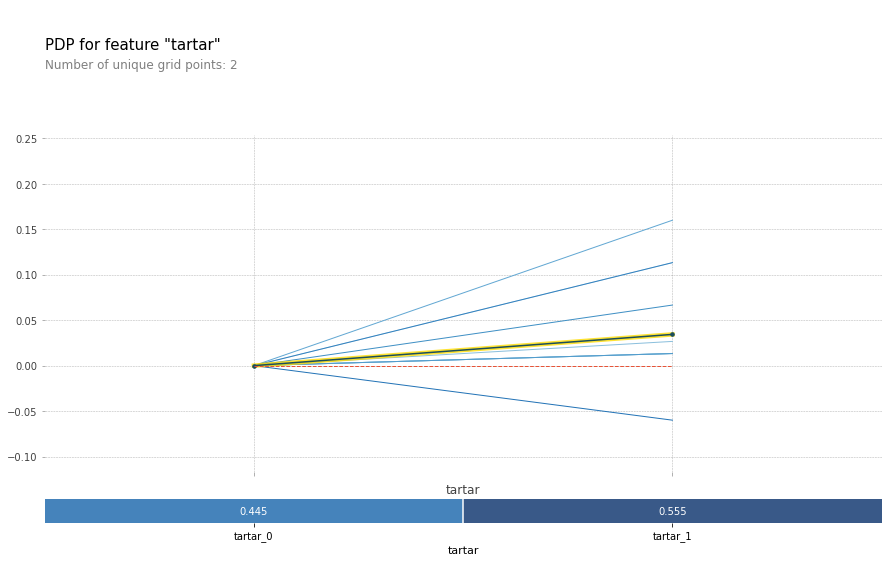

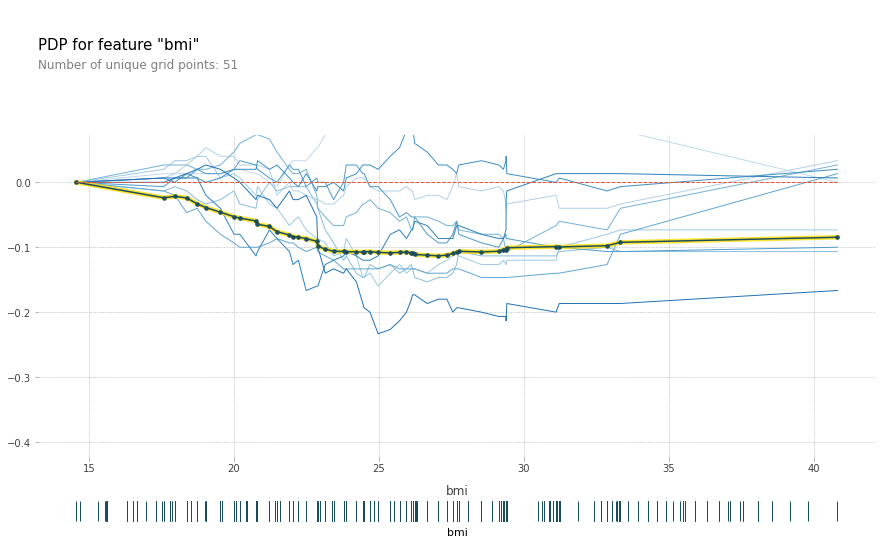

In [109]:
from pdpbox.pdp import pdp_plot
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot

features = ['gender','age','systolic','relaxation','fasting blood sugar','triglyceride','hemoglobin','AST','ALT','Gtp','dental caries','tartar','bmi']

# enumerate 루프 함수를 통해 features 를 반복
for i, feature in enumerate(features):

    isolated = pdp_isolate(
        model = rf,
        dataset = X_val,
        model_features = X_val.columns,
        feature = feature,
        grid_type = 'percentile', # default='percentile', or 'equal'
        num_grid_points = 100 # default=10, 한 샘플당 변화시키는 point 수
    )
    
    pdp_plot(isolated,
             feature_name = feature,
             plot_lines = True, #ice plots
             # 그래프에 그릴 ice 의 개수
             frac_to_plot = 10,
             plot_pts_dist = True #rug plot 그려줌

             
             )
    plt.title(feature)
plt.show()

## PDP Plots 결론

특성중요도를 확인해 가장 맨 위 특성부터 그려본 결과,

특성중요도와 타겟의 상관관계가 그렇게 크게 있지 않아보였다.

치석, 충치, 헤모글로빈, bmi, triglyceride 특성에서 양의 상관관계를 나타냈다.

치아와 관련된 특성은 아마도 가장 먼저 닿는, 부딫히는 부분이기에 라고 예상할 수 있을것같고,

bmi 특성에서의 관계는 헤모글로빈특성과 triglyceride 특성이 연관이 있을거라 예상할 수 있을것 같다.

반면에, 가장 크게 연관이 있을거라 예상했던 혈얍계 특성들이 음의 상관관계로 나타냄으로 보아,

이 데이터셋에서는 무의미한 관계임을 알 수 있다.

# 결론 - test 세트 학습
- 최종 모델로 랜덤포레스트 선정

훈련, 검증 세트를 3가지 모델로 학습 시켜보았을때,

랜덤포레스트 모델에서 제일 높은 정확도를 나타내 최종 모델로 선정했으며,

이 정확도를 기반으로 전처리한 특성들을 이용해 초기에 정의한 문제에 대입해 보았을때,

81% 의 정확도로

흡연을 했을때, 신체에 끼치는 영향들을 예측해낼수 있는 모델을 만들었다고 할 수 있다.

In [112]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

# ypred = rf.predict(X_test)

print("훈련 정확도 : ", rf.score(X_train,y_train))
print("테스트 정확도 : ", rf.score(X_test,y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.8152437382170752
